# Data Analysis and Visualization

In [2]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pl.read_csv("../data/iris.csv")

In [4]:
df.describe()

statistic,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
str,f64,f64,f64,f64,f64,str
"""count""",150.0,150.0,150.0,150.0,150.0,"""150"""
"""null_count""",0.0,0.0,0.0,0.0,0.0,"""0"""
"""mean""",75.5,5.843333,3.054,3.758667,1.198667,null
"""std""",43.445368,0.828066,0.433594,1.76442,0.763161,null
"""min""",1.0,4.3,2.0,1.0,0.1,"""Iris-setosa"""
"""25%""",38.0,5.1,2.8,1.6,0.3,null
"""50%""",76.0,5.8,3.0,4.4,1.3,null
"""75%""",113.0,6.4,3.3,5.1,1.8,null
"""max""",150.0,7.9,4.4,6.9,2.5,"""Iris-virginica"""


In [5]:
df.head(5)

Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
i64,f64,f64,f64,f64,str
1,5.1,3.5,1.4,0.2,"""Iris-setosa"""
2,4.9,3.0,1.4,0.2,"""Iris-setosa"""
3,4.7,3.2,1.3,0.2,"""Iris-setosa"""
4,4.6,3.1,1.5,0.2,"""Iris-setosa"""
5,5.0,3.6,1.4,0.2,"""Iris-setosa"""


In [6]:
cleaned_df = df.with_columns(pl.col("Species").cast(pl.Categorical).cast(pl.UInt32).alias("species_encoded"))

In [7]:
cleaned_df.head(5)

Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,species_encoded
i64,f64,f64,f64,f64,str,u32
1,5.1,3.5,1.4,0.2,"""Iris-setosa""",0
2,4.9,3.0,1.4,0.2,"""Iris-setosa""",0
3,4.7,3.2,1.3,0.2,"""Iris-setosa""",0
4,4.6,3.1,1.5,0.2,"""Iris-setosa""",0
5,5.0,3.6,1.4,0.2,"""Iris-setosa""",0


In [8]:
species_categories = cleaned_df.select(pl.col('Species', 'species_encoded')).unique().sort("Species")

species_map = {row[0]: row[1] for row in zip(species_categories['Species'], species_categories['species_encoded'])}

species_map

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = cleaned_df.drop('Species', 'species_encoded').to_numpy()
y = cleaned_df.select('species_encoded').to_numpy().flatten()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

x_scaler = StandardScaler()
X_train_scaled = x_scaler.fit_transform(X_train)
X_test_scaled = x_scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((120, 5), (30, 5), (120,), (30,))

# Build the model

In [18]:
import os 
os.environ['KERAS_BACKEND'] = 'jax'
import keras

In [19]:
# check keras backend
keras.backend.backend()

'jax'

In [20]:
def iris_model(input_shape) -> keras.Model:
    inputs = keras.Input(input_shape)
    x = keras.layers.Dense(64, activation="relu")(inputs)
    x = keras.layers.Dense(64, activation="relu")(x)
    x = keras.layers.Dense(3)(x)
    return keras.Model(inputs=inputs, outputs=x)

In [21]:
model = iris_model(input_shape=(X_train_scaled.shape[1],))

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,739 (18.51 KB)

 Trainable params: 4,739 (18.51 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()]
)

In [23]:
hist = model.fit(
    X_train_scaled,
    y_train,
    batch_size=32,
    epochs=100,
    validation_split=0.2,
    callbacks=[keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]
)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 8.3181 - sparse_categorical_accuracy: 0.3529 - val_loss: 6.3148 - val_sparse_categorical_accuracy: 0.4167
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.7749 - sparse_categorical_accuracy: 0.2799 - val_loss: 7.5318 - val_sparse_categorical_accuracy: 0.4167
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.8143 - sparse_categorical_accuracy: 0.1706 - val_loss: 6.1985 - val_sparse_categorical_accuracy: 0.4167
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.4498 - sparse_categorical_accuracy: 0.3060 - val_loss: 4.8787 - val_sparse_categorical_accuracy: 0.3333
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - loss: 3.5002 - sparse_categorical_accuracy: 0.4362 - val_loss: 3.8497 - val_sparse_categorical_accuracy: 0.2917
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.7164 - sparse_categorical_accuracy: 0.3607 - val_loss: 1.6938 - val_sparse_categorical_accuracy: 0.1667
Epoch 7/100
3/3 ━━━

Text(0.5, 1.0, 'Loss curve')

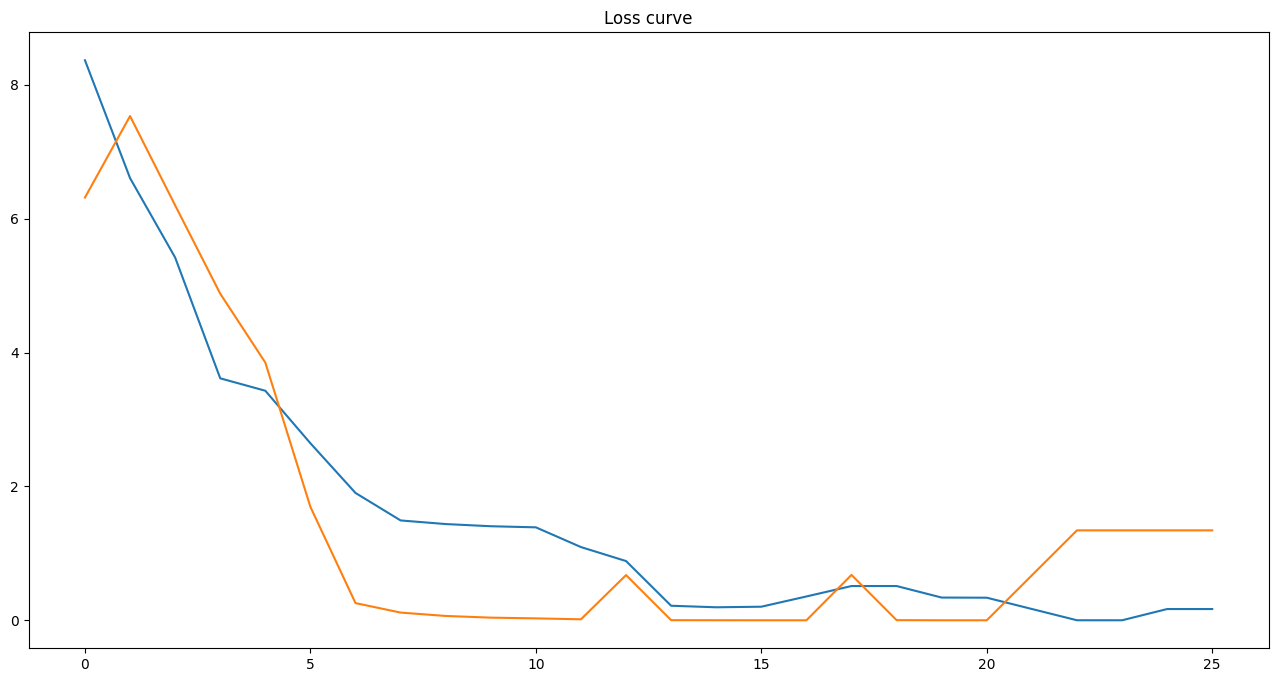

In [24]:
# plot loss curves 
plt.figure(figsize=(16, 8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss curve')